In [572]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
%matplotlib inline

In [262]:
df = pd.read_csv('mobile_price_data.csv')

In [263]:
df

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,"OPPO A83 (Black, 32 GB)","₹13,490",Black,Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5 GHz,32 GB,3 GB,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 2G",Yes,3180 mAh,73.1 mm,150.5 mm,7.7 mm,143 g
455,"OPPO A83 (Red, 16 GB)","₹9,490",Red,Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5 GHz,16 GB,2 GB,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,3180 mAh,73.1 mm,150.5 mm,7.7 mm,143 g
456,"OPPO F7 (Red, 64 GB)","₹22,990",Red,Dual Sim,15.82 cm (6.23 inch),2280 x 1080 Pixels,Android Oreo 8.1.0,Octa Core,2 GHz,64 GB,4 GB,16MP Rear Camera,25MP Front Camera,"3G, 4G, 2G",Yes,3400 mAh,75.3 mm,156 mm,7.8 mm,158 g
457,"OPPO F11 (Marble Green, 128 GB)","₹13,990",Marble Green,Dual Sim,16.59 cm (6.53 inch),1080 x 2340 pixels,Android Pie 9.0,Octa Core,2.1 GHz,128 GB,4 GB,48MP + 5MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4020 mAh,76.1 mm,162 mm,8.3 mm,188 g


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [265]:
df.describe().T

,count,unique,top,freq
mobile_name,459,363,"Vivo Z1Pro (Sonic Black, 64 GB)",4
mobile_price,459,139,"₹11,999",19
mobile_color,459,165,Black,28
dual_sim,459,2,Dual Sim,458
disp_size,459,36,16.51 cm (6.5 inch),51
resolution,459,48,2340 x 1080 pixels,66
os,459,18,Android Pie 9,126
num_cores,459,3,Octa Core,444
mp_speed,459,18,2 GHz,149
int_memory,459,7,64 GB,185


In [266]:
# Making a coopy of df
df_copy = df.copy()

In [267]:
# Dropping duplicate rows
df.drop_duplicates(keep='first',inplace=True)

In [268]:
df.reset_index(drop=True,inplace=True)

In [269]:
# Lets remove text from possoble numerical columns like: mp_speed, int_memory, ram, battery_power, etc.

In [270]:
# defining function to clean rows
def clean(df,col):
    return pd.to_numeric(df[col].str.replace('[a-zA-Z]','',regex=True))

In [271]:
df['mp_speed'] = clean(df,'mp_speed')
df['int_memory'] = clean(df,'int_memory')
df['ram'] = clean(df,'ram')
df['battery_power'] = clean(df,'battery_power')
df['mob_width'] = clean(df,'mob_width')
df['mob_height'] = clean(df,'mob_height')
df['mob_depth'] = clean(df,'mob_depth')
df['mob_weight'] = clean(df,'mob_weight')

In [272]:
# Removing special characters from mobile_price column

In [273]:
def clean_price(df,col,chrs):
    row = df[col]
    for i in chrs:
        row =row.str.replace(i,'',regex=False)
    return pd.to_numeric(row)

In [274]:
df['mobile_price'] = clean_price(df,'mobile_price',['₹',','])

In [275]:
# getting size in cm in disp_size column

In [276]:
def get_size(df,col):
    row = df[col]
    for i in [' cm .*']:
        row = row.str.replace(i,'',regex=True)
    return pd.to_numeric(row)

In [277]:
df['disp_size'] = get_size(df,'disp_size')

In [278]:
#creating a column for brand
df['brand'] = df['mobile_name'].apply(lambda x: re.findall(r'[a-zA-Z]*',x)[0])

In [279]:
df.brand.value_counts()

Redmi      87
Vivo       79
OPPO       72
Realme     67
Infinix    36
POCO       31
Samsung    17
Mi         16
MI          1
Name: brand, dtype: int64

In [280]:
# MI which contains one entry is misspelt correcting it to Mi
df[df['brand']=='MI']

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,...,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,brand
96,"MI3 (Metallic Grey, 16 GB)",13999,Metallic Grey,Single Sim,12.7,1920 x 1080 Pixels,Android KitKat 4.4.2,Quad Core,2.3,16,...,13MP Rear Camera,2MP Front Camera,3G,Yes,3050,73.6,144.0,8.1,145.0,MI


In [281]:
df.iloc[[96],[20]] = 'Mi'

In [282]:
df.brand.value_counts()

Redmi      87
Vivo       79
OPPO       72
Realme     67
Infinix    36
POCO       31
Mi         17
Samsung    17
Name: brand, dtype: int64

c:\users\ukarj\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


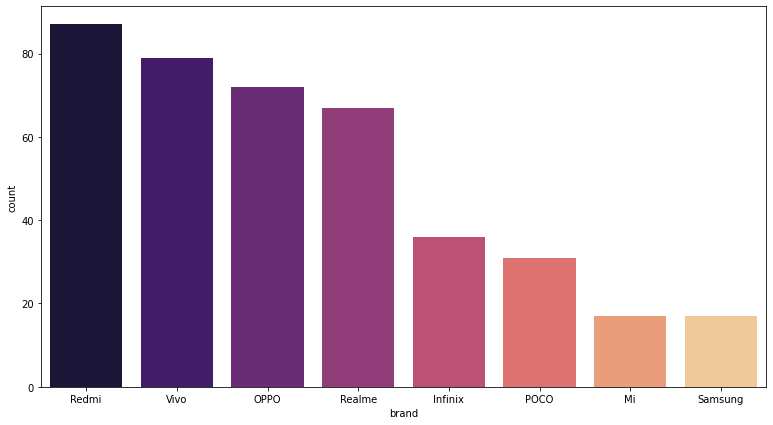

In [283]:
plt.figure(figsize=(13,7))
sns.countplot(df.brand,order=df.brand.value_counts().index,palette='magma')
plt.show()

We can see that Redmi brand is leading the mobile market as per the data, followed by Vivo, Oppo, realme and others,<br>
While Mi and Samsung are the at lowest

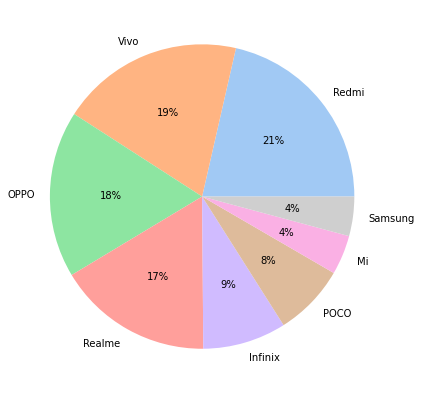

In [284]:
plt.figure(figsize=(13,7))
plt.pie(df.brand.value_counts(),labels=df.brand.value_counts().index,autopct='%.0f%%',colors=sns.color_palette('pastel'))
plt.show()

Redmi has 21% of market share followed by Vivo 19%, Oppo 18% and so on, with 4% for each Mi and Samsung

In [285]:
df.drop(['mobile_name'],axis=1,inplace=True)

In [286]:
# Checking for null values
df.isnull().sum()

mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
bluetooth        0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
brand            0
dtype: int64

In [287]:
df

,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,brand
0,8999,So White,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0,Realme
1,8999,So Blue,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0,Realme
2,9999,So Blue,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0,Realme
3,9999,So White,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0,Realme
4,11999,That Green,Dual Sim,16.51,1600 x 720 Pixels,Android 10,Octa Core,2.0,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.4,164.4,9.00,199.0,Realme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,13990,Red,Dual Sim,14.48,1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5,64,4,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 2G",Yes,3180,73.1,150.5,7.70,143.0,OPPO
402,17000,Stellar Purple,Dual Sim,16.00,2340 x 1080 pixels,Android Oreo 8.1.0,Octa Core,2.0,64,4,16MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,3500,74.0,156.7,7.99,169.0,OPPO
403,15000,Purple,Dual Sim,15.75,1520 x 720 Pixels,Android Oreo 8.1,Octa Core,1.8,64,4,13MP + 2MP,8MP Front Camera,"3G, 4G, 2G",Yes,4230,75.6,156.2,8.20,168.0,OPPO
404,41990,Jet Black,Dual Sim,16.76,2340 x 1080 pixels,Android Pie 9.0,Octa Core,2.8,256,8,48MP + 13MP + 8MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4065,77.2,162.0,9.30,215.0,OPPO


In [288]:
df.bluetooth.value_counts()

Yes    406
Name: bluetooth, dtype: int64

In [289]:
# Since all rows contains same entry dropping the column
df.drop(['bluetooth'],axis=1,inplace=True)

In [290]:
df.dual_sim.value_counts()

Dual Sim      405
Single Sim      1
Name: dual_sim, dtype: int64

In [291]:
# Since their is just one entry in Single Sim category of dual_sim column removing it and dropping the row

In [292]:
df.drop(df[df['dual_sim']=='Single Sim'].index,inplace=True)

In [293]:
df.drop(['dual_sim'],axis=1,inplace=True)

In [294]:
df.describe(include='object').T

,count,unique,top,freq
mobile_color,405,164,Black,24
resolution,405,48,2340 x 1080 pixels,59
os,405,17,Android Pie 9,107
num_cores,405,3,Octa Core,393
p_cam,405,49,13MP + 2MP,60
f_cam,405,15,16MP Front Camera,100
network,405,17,"3G, 4G VOLTE, 4G, 2G",109
brand,405,8,Redmi,87


In [295]:
df.reset_index(drop=True,inplace=True)

In [296]:
# Processing for mobile_color column

In [297]:
def rename_color(color):
    for i,j in enumerate(df.mobile_color.str.lower()):
        if color in j:
            df.loc[[i],['mobile_color']]=color
        else:
            df.loc[[i],['mobile_color']]=j

In [298]:
# Lets rename all kinds of white to white
rename_color('white')

In [299]:
# Now for all kinds of black
rename_color('black')

In [300]:
# Similarly for other colors
rename_color('blue')
rename_color('green')
rename_color('red')
rename_color('purple')
rename_color('grey')

In [301]:
df.mobile_color.unique()

array(['white', 'blue', 'green', 'black', 'red', 'lightning orange',
       'diamond ruby', 'diamond sapphire', 'purple', 'concrete', 'grey',
       'gold', 'rose gold', 'matte gold', 'mystic silver',
       'metallic gold', 'violet', 'ocean wave', 'tradew gray',
       'berlin gray', 'mocha brown', 'blush gold', 'quetzal cyan',
       'space gray', 'flowing silver', 'champagne', 'vanilla mint',
       'glaring gold', 'radiant mist'], dtype=object)

In [302]:
rename_color('gray')
rename_color('gold')
rename_color('silver')

In [303]:
rename_color('cyan')
rename_color('orange')
rename_color('brown')

In [304]:
df.mobile_color.unique()

array(['white', 'blue', 'green', 'black', 'red', 'orange', 'diamond ruby',
       'diamond sapphire', 'purple', 'concrete', 'grey', 'gold', 'silver',
       'violet', 'ocean wave', 'gray', 'brown', 'cyan', 'champagne',
       'vanilla mint', 'radiant mist'], dtype=object)

Upon researching I found similarities between colors that can be considered as same here
<br>ruby is red,<br>sapphire,ocean wave,cyan is blue, <br>brown,champagne is gold<br>vanilla mint is white,<br>radiant mist is purple <br>concrete,grey,gray are all same

In [305]:
df[df['mobile_color']=='ocean wave'].index

Int64Index([267, 269], dtype='int64')

In [306]:
df.loc[[267,269],['mobile_color']]='blue'

In [307]:
df[(df['mobile_color']=='gray') | (df['mobile_color']=='concrete')].index

Int64Index([41, 274, 277, 281, 292], dtype='int64')

In [308]:
df.loc[[41,274,277,281,292],['mobile_color']]='grey'

In [309]:
df[(df['mobile_color']=='diamond sapphire') | (df['mobile_color']=='cyan')].index

Int64Index([30, 286, 293], dtype='int64')

In [310]:
df.loc[[30,286,293],['mobile_color']]='blue'

In [311]:
df.mobile_color.unique()

array(['white', 'blue', 'green', 'black', 'red', 'orange', 'diamond ruby',
       'purple', 'grey', 'gold', 'silver', 'violet', 'brown', 'champagne',
       'vanilla mint', 'radiant mist'], dtype=object)

In [312]:
df[df['mobile_color']=='radiant mist'].index

Int64Index([385], dtype='int64')

In [313]:
df.loc[[385],['mobile_color']]='purple'

In [314]:
df[df['mobile_color']=='diamond ruby'].index

Int64Index([28], dtype='int64')

In [315]:
df.loc[[28],['mobile_color']]='red'

In [316]:
df[(df['mobile_color']=='brown') | (df['mobile_color']=='champagne')].index

Int64Index([279, 361], dtype='int64')

In [317]:
df.loc[[279,361],['mobile_color']]='gold'

In [318]:
df[df['mobile_color']=='vanilla mint'].index

Int64Index([362, 380], dtype='int64')

In [319]:
df.loc[[362,380],['mobile_color']]='white'

In [320]:
df.mobile_color.value_counts()

blue      114
black     102
red        48
white      42
gold       33
green      21
purple     19
grey       17
violet      5
silver      3
orange      1
Name: mobile_color, dtype: int64

furthermore, orange can be considered as red, as orange has just one entry and red is closest to orange<br>
similarly silver to grey and violet to purple

In [321]:
df[df['mobile_color']=='orange'].index

Int64Index([22], dtype='int64')

In [322]:
df.loc[[22],['mobile_color']]='red'

In [323]:
df[df['mobile_color']=='silver'].index

Int64Index([192, 193, 346], dtype='int64')

In [324]:
df.loc[[192,193,346],['mobile_color']]='grey'

In [325]:
df[df['mobile_color']=='violet'].index

Int64Index([266, 268, 272, 285, 294], dtype='int64')

In [326]:
df.loc[[266,268,272,285,294],['mobile_color']]='purple'

In [327]:
df.mobile_color.value_counts()

blue      114
black     102
red        49
white      42
gold       33
purple     24
green      21
grey       20
Name: mobile_color, dtype: int64

c:\users\ukarj\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


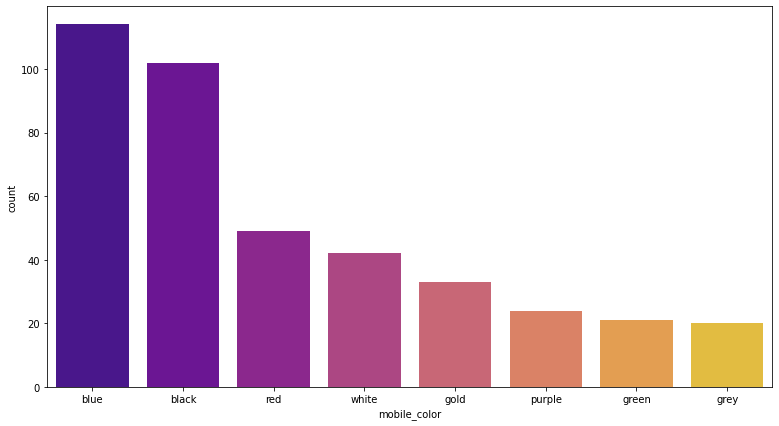

In [328]:
plt.figure(figsize=(13,7))
sns.countplot(df.mobile_color,order=df.mobile_color.value_counts().index,palette='plasma')
plt.show()

In [329]:
df

,mobile_price,mobile_color,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,brand
0,8999,white,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,Realme
1,8999,blue,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,Realme
2,9999,blue,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,Realme
3,9999,white,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,Realme
4,11999,green,16.51,1600 x 720 Pixels,Android 10,Octa Core,2.0,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.4,164.4,9.00,199.0,Realme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,13990,red,14.48,1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5,64,4,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 2G",3180,73.1,150.5,7.70,143.0,OPPO
401,17000,purple,16.00,2340 x 1080 pixels,Android Oreo 8.1.0,Octa Core,2.0,64,4,16MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",3500,74.0,156.7,7.99,169.0,OPPO
402,15000,purple,15.75,1520 x 720 Pixels,Android Oreo 8.1,Octa Core,1.8,64,4,13MP + 2MP,8MP Front Camera,"3G, 4G, 2G",4230,75.6,156.2,8.20,168.0,OPPO
403,41990,black,16.76,2340 x 1080 pixels,Android Pie 9.0,Octa Core,2.8,256,8,48MP + 13MP + 8MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",4065,77.2,162.0,9.30,215.0,OPPO


In [330]:
# Lets work on num_cores column

In [331]:
df.num_cores.value_counts()

Octa Core      393
Quad Core       11
Single Core      1
Name: num_cores, dtype: int64

Single core means 1, Quad Core means 4 and Octa Core means 8

c:\users\ukarj\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_cores', ylabel='count'>

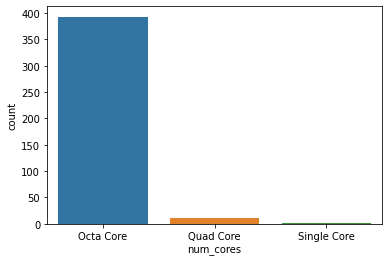

In [332]:
sns.countplot(df.num_cores)

The number of mobiles with Octa Core is substantially higher than mobiles with Quad core and Single core

In [333]:
#renaming these values
list(df[df['num_cores']=='Single Core'].index)

[395]

In [334]:
df.loc[[395],['num_cores']]=1

In [335]:
quad = list(df[df['num_cores']=='Quad Core'].index)
octa = list(df[df['num_cores']=='Octa Core'].index)

In [336]:
df.loc[quad,['num_cores']]=4
df.loc[octa,['num_cores']]=8

In [337]:
df['num_cores'] = pd.to_numeric(df['num_cores'])

In [338]:
df.os.unique()

array(['Android 10', 'Android Pie 9.0', 'Android Pie 9',
       'Android Oreo 8.1', 'Android Pie 10', 'Android Nougat 7.1.1',
       'Android Oreo 8.0', 'Android Nougat 7.1.2',
       'Android Marshmallow 6.0.1', 'Android Nougat 7.1',
       'Android Marshmallow 6', 'Android Nougat 7',
       'Android Lollipop 5.4.1', 'Android Oreo 8.1.0', 'Android Oreo 8',
       'Android Lollipop 5.1', 'Android Lollipop 5.1.1'], dtype=object)

In [339]:
df.os.value_counts()

Android Pie 9                107
Android Oreo 8.1              79
Android Pie 9.0               75
Android 10                    68
Android Pie 10                15
Android Oreo 8.1.0            12
Android Nougat 7.1.2          10
Android Nougat 7.1             8
Android Nougat 7               7
Android Oreo 8                 7
Android Oreo 8.0               6
Android Lollipop 5.1           3
Android Marshmallow 6          3
Android Marshmallow 6.0.1      2
Android Lollipop 5.4.1         1
Android Nougat 7.1.1           1
Android Lollipop 5.1.1         1
Name: os, dtype: int64

In [340]:
# Renaming these in similar way can be hectic, lets define a function for it
def reduce(df,col,old,new):
    inds = list(df[df[col]==old].index)
    df.loc[inds,[col]] = new

In [341]:
# Lets ignore the second decimals here and group os

In [342]:
reduce(df,'os','Android Pie 9',9.0)
reduce(df,'os','Android Oreo 8.1',8.1)
reduce(df,'os','Android Pie 9.0',9.0)
reduce(df,'os','Android 10',10.0)
reduce(df,'os','Android Pie 10',10.0)
reduce(df,'os','Android Oreo 8.1.0',8.1)
reduce(df,'os','Android Nougat 7.1.2',7.1)
reduce(df,'os','Android Nougat 7.1',7.1)
reduce(df,'os','Android Nougat 7',7.0)
reduce(df,'os','Android Oreo 8',8.0)
reduce(df,'os','Android Oreo 8.0',8.0)
reduce(df,'os','Android Lollipop 5.1',5.1)
reduce(df,'os','Android Marshmallow 6',6.0)
reduce(df,'os','Android Marshmallow 6.0.1',6.0)
reduce(df,'os','Android Lollipop 5.4.1',5.4)
reduce(df,'os','Android Nougat 7.1.1',7.1)
reduce(df,'os','Android Lollipop 5.1.1',5.1)

In [343]:
df['os'] = pd.to_numeric(df['os'])

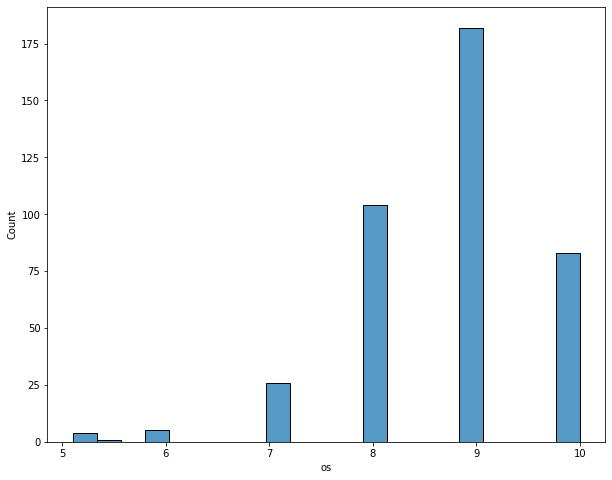

In [344]:
plt.figure(figsize=(10,8))
sns.histplot(df.os)
plt.show()

Most of the mobiles have android 9

In [345]:
df.describe(include='object')

,mobile_color,resolution,p_cam,f_cam,network,brand
count,405,405,405,405,405,405
unique,8,48,49,15,17,8
top,blue,2340 x 1080 pixels,13MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Redmi
freq,114,59,60,100,109,87


In [346]:
df.head()

,mobile_price,mobile_color,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,brand
0,8999,white,16.56,1600 x 720 Pixels,10.0,8,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,Realme
1,8999,blue,16.56,1600 x 720 Pixels,10.0,8,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,Realme
2,9999,blue,16.56,1600 x 720 Pixels,10.0,8,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,Realme
3,9999,white,16.56,1600 x 720 Pixels,10.0,8,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,Realme
4,11999,green,16.51,1600 x 720 Pixels,10.0,8,2.0,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.4,164.4,9.00,199.0,Realme


In [347]:
# Some other visualizations

c:\users\ukarj\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_memory', ylabel='count'>

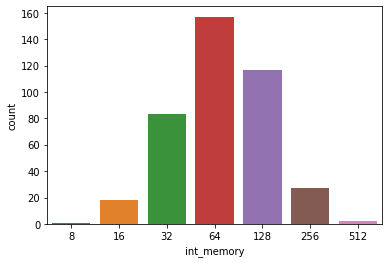

In [348]:
sns.countplot(df.int_memory)

<AxesSubplot:xlabel='mob_weight', ylabel='Count'>

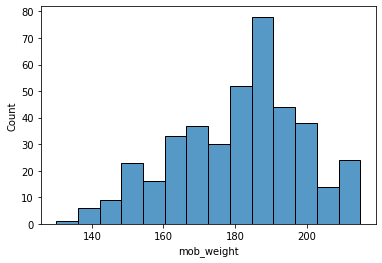

In [349]:
sns.histplot(df.mob_weight)

In [350]:
df.network.value_counts()

3G, 4G VOLTE, 4G, 2G        109
3G, 4G VOLTE, 2G             79
4G VOLTE, 4G, 3G, 2G         76
3G, 4G, 2G                   34
4G, 3G, 2G                   26
4G VOLTE, 4G, 2G, 3G         17
4G VOLTE, 3G, 2G             13
4G VOLTE, 3G                 10
3G, 4G VOLTE, 4G              9
4G VOLTE                      8
3G, 4G VOLTE                  8
5G, 4G VOLTE, 4G, 3G, 2G      3
4G VOLTE, 5G                  3
4G, 2G, 3G                    3
4G VOLTE, 4G                  3
2G                            2
3G, 4G                        2
Name: network, dtype: int64

In [351]:
# we can reduce the network column with reduce function earlier defined
# we will make new variables as 5G, 4G VOLTE, 4G, 3G. 2G as per the highest from available

In [352]:
reduce(df,'network','3G, 4G VOLTE, 4G, 2G','4G VOLTE')
reduce(df,'network','3G, 4G VOLTE, 2G','4G VOLTE')
reduce(df,'network','4G VOLTE, 4G, 3G, 2G','4G VOLTE')
reduce(df,'network','3G, 4G, 2G','4G')
reduce(df,'network','4G, 3G, 2G','4G')
reduce(df,'network','4G VOLTE, 4G, 2G, 3G','4G VOLTE')
reduce(df,'network','4G VOLTE, 3G, 2G','4G VOLTE')
reduce(df,'network','4G VOLTE, 3G','4G VOLTE')
reduce(df,'network','3G, 4G VOLTE, 4G','4G VOLTE')
reduce(df,'network','4G VOLTE','4G VOLTE')
reduce(df,'network','3G, 4G VOLTE','4G VOLTE')
reduce(df,'network','5G, 4G VOLTE, 4G, 3G, 2G','5G')
reduce(df,'network','4G VOLTE, 5G','4G VOLTE')
reduce(df,'network','4G, 2G, 3G','4G')
reduce(df,'network','4G VOLTE, 4G','4G VOLTE')
reduce(df,'network','2G','2G')
reduce(df,'network','3G, 4G','4G')

<AxesSubplot:>

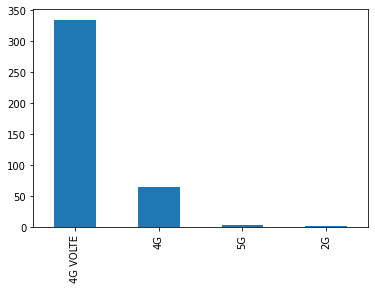

In [353]:
df.network.value_counts().plot(kind='bar')

In [354]:
df.resolution.value_counts()

2340 x 1080 pixels     59
2400 x 1080 Pixels     45
1520 x 720 pixels      32
1600 x 720 Pixels      25
1080 x 2340 Pixels     19
1520 x 720 Pixels      19
2160 x 1080 pixels     14
2160 x 1080 Pixels     13
1440 x 720 pixels      12
720 x 1600 Pixels      12
2340 x 1080 Pixels     12
1440 x 720 Pixels      11
2400 × 1080 Pixels     11
1280 x 720 Pixels       9
720 x 1544 Pixels       8
1080 x 2160 pixels      7
1560 x 720 pixels       7
2280 x 1080 pixels      7
2400 x 1080 pixel       6
1560 x 720 Pixels       6
1520 x 720$$pixel       5
1080 x 2400 Pixels      5
2280 x 1080$$Pixels     5
1500 x 720 pixels       5
1520 x 720$$Pixels      4
2280 x 1080 Pixels      4
1080 x 2340 pixels      4
720 x 1544 pixels       3
2340 x 1080 Pixel       3
1920 x 1080 pixels      3
720 x 1520 pixels       3
1080 x 1920 Pixels      3
720*1440 Pixels         3
720 x 1440 Pixels       3
1280 x 720 pixels       2
2400 x 1080 Pixel       2
2340 x 1080$$pixel      2
2340 x 1080$$Pixel      2
720 x 1560 p

In [355]:
# Lets clean resolutions column

In [356]:
df['resolution'] = df['resolution'].str.replace('$',' ',regex=False)

In [357]:
df['resolution'] = df['resolution'].str.replace('*',' x ',regex=False)

In [358]:
resols = list(df.resolution.value_counts().index)

In [359]:
newresols=[]

In [360]:
for i in resols:
    tmp=i.split(' ')
    a=int(tmp[0])
    b=int(tmp[2])
    ntmp=str(max(a,b))+' x '+str(min(a,b))
    newresols.append(ntmp)

In [361]:
for i,j in zip(resols,newresols):
    reduce(df,'resolution',i,j)

In [362]:
df.resolution.value_counts()

2340 x 1080    101
2400 x 1080     70
1520 x 720      65
1600 x 720      37
2160 x 1080     34
1440 x 720      30
2280 x 1080     16
1560 x 720      14
1280 x 720      12
1544 x 720      11
1920 x 1080      7
1500 x 720       5
960 x 540        2
2316 x 1080      1
Name: resolution, dtype: int64

In [363]:
df.describe(include='object')

,mobile_color,resolution,p_cam,f_cam,network,brand
count,405,405,405,405,405,405
unique,8,14,49,15,4,8
top,blue,2340 x 1080,13MP + 2MP,16MP Front Camera,4G VOLTE,Redmi
freq,114,101,60,100,335,87


In [364]:
# making a dictionary for cat coding brand and mobile_color columns

In [365]:
brands_dict = dict()
colors_dict = dict()

In [366]:
for no,br in enumerate(list(df.brand.value_counts().index)):
    brands_dict[br]=no

In [367]:
brands_dict

{'Redmi': 0,
 'Vivo': 1,
 'OPPO': 2,
 'Realme': 3,
 'Infinix': 4,
 'POCO': 5,
 'Samsung': 6,
 'Mi': 7}

In [368]:
for no,co in enumerate(list(df.mobile_color.value_counts().index)):
    colors_dict[co]=no

In [369]:
colors_dict

{'blue': 0,
 'black': 1,
 'red': 2,
 'white': 3,
 'gold': 4,
 'purple': 5,
 'green': 6,
 'grey': 7}

In [370]:
df.network.value_counts()

4G VOLTE    335
4G           65
5G            3
2G            2
Name: network, dtype: int64

In [371]:
network_dict = {'5G':4,'4G VOLTE':3,'4G':2,'2G':1}

In [372]:
# Mapping these codes in df

In [373]:
df['brand'] = df['brand'].map(brands_dict)
df['mobile_color'] = df['mobile_color'].map(colors_dict)
df['network'] = df['network'].map(network_dict)

In [376]:
# lets code resolution, p_cam, f_cam  with category codes
df['resolution']=df['resolution'].astype('category').cat.codes
df['p_cam']=df['p_cam'].astype('category').cat.codes
df['f_cam']=df['f_cam'].astype('category').cat.codes

In [377]:
df.dtypes

mobile_price       int64
mobile_color       int64
disp_size        float64
resolution          int8
os               float64
num_cores          int64
mp_speed         float64
int_memory         int64
ram                int64
p_cam               int8
f_cam               int8
network            int64
battery_power      int64
mob_width        float64
mob_height       float64
mob_depth        float64
mob_weight       float64
brand              int64
dtype: object

In [378]:
# Though All the column may look numerical but some of them are categorical represented by number, changing these to category type.
# out of which disp_size, os, num_cores, mp_speed, int_memory, ram, battery_power, mob_width, mob_height, mob_depth, mob_weight can be left as numeriacal as they have numerical significance as its label

df['mobile_color'] = df['mobile_color'].astype('category')
df['resolution'] = df['resolution'].astype('category')
df['p_cam'] = df['p_cam'].astype('category')
df['f_cam'] = df['f_cam'].astype('category')
df['network'] = df['network'].astype('category')
df['brand'] = df['brand'].astype('category')

In [379]:
df.describe()

,mobile_price,disp_size,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,16689.629630,15.921975,8.762469,7.874074,2.122143,88.671605,4.938272,4175.333333,74.090593,157.723802,11.050346,180.856049
std,8730.981798,0.806525,0.946920,0.735550,0.351857,65.985472,2.082136,603.463149,13.941616,12.882975,13.626880,17.449679
min,6000.000000,11.940000,5.100000,1.000000,1.300000,8.000000,1.000000,2000.000000,8.350000,7.380000,7.300000,130.000000
25%,10900.000000,15.720000,8.100000,8.000000,2.000000,32.000000,3.000000,4000.000000,74.800000,155.900000,8.100000,168.000000
50%,14990.000000,16.000000,9.000000,8.000000,2.000000,64.000000,4.000000,4030.000000,75.300000,158.700000,8.500000,184.000000
75%,18990.000000,16.510000,9.000000,8.000000,2.300000,128.000000,6.000000,4500.000000,75.800000,162.040000,8.890000,191.000000
max,60990.000000,17.020000,10.000000,8.000000,2.960000,512.000000,12.000000,6000.000000,159.000000,175.000000,92.000000,215.000000


In [386]:
cat_features = list(df.describe(include='category').T.index)

In [387]:
# lets check for outliers

In [409]:
# From the describe table above it can be seen that the mob_depth column has min 7.3 and max 92 which seems odd, lets look into it.
# similarly mob_width and mob_height

In [410]:
df.mob_depth.unique()

array([ 8.95 ,  9.   ,  8.9  ,  8.7  ,  8.5  ,  8.55 ,  9.65 ,  9.6  ,
        9.4  ,  9.3  ,  8.6  ,  8.3  ,  8.8  ,  8.475,  8.1  ,  7.7  ,
        8.26 ,  7.3  ,  8.96 ,  8.05 , 92.   , 75.3  ,  8.4  ,  8.35 ,
        9.55 ,  8.47 ,  8.92 ,  8.13 ,  8.68 ,  8.28 ,  9.11 ,  8.85 ,
        8.89 ,  8.54 ,  8.21 ,  9.8  ,  7.9  ,  7.98 ,  7.77 ,  7.89 ,
        7.8  ,  7.5  , 75.   ,  7.6  ,  8.65 ,  7.95 ,  8.79 ,  9.1  ,
        8.2  ,  9.5  ,  8.67 ,  7.4  ,  7.99 ,  7.38 , 76.   ])

As per [this source ↗](https://images.squarespace-cdn.com/content/v1/57302e3040261d2ef98c91c0/1566370953244-OHZG55B62NV35SQPO5S4/Screen+Shot+2019-08-03+at+3.16.39+PM.png?format=500w) depth is the thickness


In [418]:
df[df['mob_depth']>10]

,mobile_price,mobile_color,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,brand
102,7399,0,15.80,3,9.0,8,2.0,32,2,10,13,3,5000,9.00,175.00,92.0,186.0,0
103,7499,7,15.80,3,9.0,8,2.0,32,3,10,13,3,5000,9.00,175.00,92.0,186.0,0
104,11199,3,16.00,9,9.0,8,2.0,64,4,33,1,3,4000,8.35,158.30,75.3,190.0,0
105,13261,0,16.00,9,9.0,8,2.0,128,6,33,1,3,4000,8.35,158.30,75.3,190.0,0
106,10978,0,16.00,9,9.0,8,2.0,32,3,33,1,3,4000,8.35,158.30,75.3,190.0,0
109,11280,0,16.00,9,9.0,8,2.0,64,4,33,1,3,4000,8.35,158.30,75.3,190.0,0
110,10100,1,16.00,9,9.0,8,2.0,64,4,33,1,3,4000,8.35,158.30,75.3,190.0,0
111,7450,3,15.80,3,9.0,8,2.0,32,3,10,13,3,5000,9.00,175.00,92.0,186.0,0
116,7499,0,15.80,3,9.0,8,2.0,32,3,10,13,3,5000,9.00,175.00,92.0,186.0,0
156,8499,3,15.80,3,9.0,8,2.0,32,2,10,13,3,5000,9.00,175.00,92.0,186.0,0


In [413]:
# it seems a decimal point is misplaced, correcting it by dividing it by 10

In [414]:
temp_index = list(df[df['mob_depth']>10].index)

In [429]:
df.loc[temp_index,['mob_depth']] = df[df['mob_depth']>10]['mob_depth']/10

In [441]:
df[df['mob_width']<70]

,mobile_price,mobile_color,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,brand
102,7399,0,15.80,3,9.0,8,2.0,32,2,10,13,3,5000,9.00,175.0,9.20,186.0,0
103,7499,7,15.80,3,9.0,8,2.0,32,3,10,13,3,5000,9.00,175.0,9.20,186.0,0
104,11199,3,16.00,9,9.0,8,2.0,64,4,33,1,3,4000,8.35,158.3,7.53,190.0,0
105,13261,0,16.00,9,9.0,8,2.0,128,6,33,1,3,4000,8.35,158.3,7.53,190.0,0
106,10978,0,16.00,9,9.0,8,2.0,32,3,33,1,3,4000,8.35,158.3,7.53,190.0,0
109,11280,0,16.00,9,9.0,8,2.0,64,4,33,1,3,4000,8.35,158.3,7.53,190.0,0
110,10100,1,16.00,9,9.0,8,2.0,64,4,33,1,3,4000,8.35,158.3,7.53,190.0,0
111,7450,3,15.80,3,9.0,8,2.0,32,3,10,13,3,5000,9.00,175.0,9.20,186.0,0
116,7499,0,15.80,3,9.0,8,2.0,32,3,10,13,3,5000,9.00,175.0,9.20,186.0,0
156,8499,3,15.80,3,9.0,8,2.0,32,2,10,13,3,5000,9.00,175.0,9.20,186.0,0


In [442]:
# it seems the mob_width below 69 are having transcription error to correct it multiplying them by 10

In [443]:
temp_index = list(df[df['mob_width']<69].index)

In [444]:
df.loc[temp_index,['mob_width']] = df[df['mob_width']<69]['mob_width']*10

In [445]:
# Similarly for mob_height

In [451]:
df[df['mob_height']<100]

,mobile_price,mobile_color,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,brand
249,17490,0,16.26,11,9.0,8,2.3,128,4,33,3,3,6000,159.0,9.00,7.5,186.0,6
264,11995,1,13.97,0,7.0,8,1.6,16,2,15,12,2,3000,152.4,78.60,7.6,170.0,6
265,10995,4,13.97,0,7.0,8,1.6,16,2,15,12,2,3000,152.4,78.60,7.6,170.0,6
395,11990,7,13.97,0,5.1,1,1.5,32,3,15,3,3,3075,154.5,7.38,7.6,160.0,2


In [452]:
# just two with indexes 249 and 395 needs to be multiplied by 10

In [457]:
df.loc[[249,395],['mob_height']] = df.iloc[[249,395]]['mob_height']*10

In [458]:
df.describe()

,mobile_price,disp_size,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,16689.629630,15.921975,8.762469,7.874074,2.122143,88.671605,4.938272,4175.333333,76.418370,158.087802,8.484790,180.856049
std,8730.981798,0.806525,0.946920,0.735550,0.351857,65.985472,2.082136,603.463149,8.217081,9.161144,0.541926,17.449679
min,6000.000000,11.940000,5.100000,1.000000,1.300000,8.000000,1.000000,2000.000000,69.000000,73.800000,7.300000,130.000000
25%,10900.000000,15.720000,8.100000,8.000000,2.000000,32.000000,3.000000,4000.000000,75.000000,155.900000,8.100000,168.000000
50%,14990.000000,16.000000,9.000000,8.000000,2.000000,64.000000,4.000000,4030.000000,75.400000,158.700000,8.500000,184.000000
75%,18990.000000,16.510000,9.000000,8.000000,2.300000,128.000000,6.000000,4500.000000,76.000000,162.040000,8.800000,191.000000
max,60990.000000,17.020000,10.000000,8.000000,2.960000,512.000000,12.000000,6000.000000,159.000000,175.000000,9.800000,215.000000


In [459]:
# Saving this cleaned df as csv
df.to_csv('cleaned(numerical).csv')

In [463]:
df_cleaned = df.copy()

## Modelling

- With Numerical features using Linear Regression

In [480]:
num_features = list(df._get_numeric_data().columns)

In [481]:
num_features.remove('mobile_price')

In [495]:
# Seperating data into X and Y
X = df[num_features]
Y = df['mobile_price']

In [496]:
# Modelling with all features

In [497]:
# Scaling
ss = StandardScaler()

In [499]:
X_scaled = ss.fit_transform(X)

In [566]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=29)

In [567]:
lm = LinearRegression()

In [568]:
lm.fit(x_train,y_train)

LinearRegression()

In [569]:
y_tr_pred = lm.predict(x_train)
y_te_pred = lm.predict(x_test)

In [570]:
# Scoring
rmse_tr = np.sqrt(metrics.mean_squared_error(y_train,y_tr_pred))
r2_tr = metrics.r2_score(y_train,y_tr_pred)

rmse_te = np.sqrt(metrics.mean_squared_error(y_test,y_te_pred))
r2_te = metrics.r2_score(y_test,y_te_pred)


In [571]:
print('Training Scores --\nRmse : {}\nR2 : {}\n'.format(rmse_tr,r2_tr))
print('Testing Scores --\nRmse : {}\nR2 : {}\n'.format(rmse_te,r2_te))

Training Scores --
Rmse : 4713.222385065223
R2 : 0.6992521738197959

Testing Scores --
Rmse : 4323.764865058358
R2 : 0.7792639618296011



<hr>

- with all features using Decision tree

In [553]:
X = df.drop(['mobile_price'],axis=1)
Y = df['mobile_price']

In [560]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=29)

In [561]:
dtr = DecisionTreeRegressor()

In [562]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [563]:
y_tr_pred = dtr.predict(x_train)
y_te_pred = dtr.predict(x_test)

In [564]:
rmse_tr = np.sqrt(metrics.mean_squared_error(y_train,y_tr_pred))
r2_tr = metrics.r2_score(y_train,y_tr_pred)

rmse_te = np.sqrt(metrics.mean_squared_error(y_test,y_te_pred))
r2_te = metrics.r2_score(y_test,y_te_pred)


In [565]:
print('Training Scores --\nRmse : {}\nR2 : {}\n'.format(rmse_tr,r2_tr))
print('Testing Scores --\nRmse : {}\nR2 : {}\n'.format(rmse_te,r2_te))

Training Scores --
Rmse : 566.4921947729581
R2 : 0.9956553530153488

Testing Scores --
Rmse : 3580.977336927132
R2 : 0.8485908043965599



- Using GridsearchCV for further tuning

In [573]:
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
          'max_features':['auto','log2','sqrt'],
         'splitter':['best','random']}

In [589]:
dtr = DecisionTreeRegressor(random_state=51)

In [590]:
g_search = GridSearchCV(estimator=dtr,
                       param_grid=params,
                       cv=3,verbose=1,
                       return_train_score=True)

In [591]:
g_search.fit(x_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=51),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'splitter': ['best', 'random']},
             return_train_score=True, verbose=1)

In [592]:
g_search.best_params_

{'max_depth': 7, 'max_features': 'log2', 'splitter': 'best'}

In [593]:
dtr = DecisionTreeRegressor(max_depth=7,max_features='log2',
                            splitter='best',random_state=29)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features='log2', random_state=29)

In [595]:
y_tr_pred = dtr.predict(x_train)
y_te_pred = dtr.predict(x_test)

rmse_tr = np.sqrt(metrics.mean_squared_error(y_train,y_tr_pred))
r2_tr = metrics.r2_score(y_train,y_tr_pred)

rmse_te = np.sqrt(metrics.mean_squared_error(y_test,y_te_pred))
r2_te = metrics.r2_score(y_test,y_te_pred)

print('Training Scores --\nRmse : {}\nR2 : {}\n'.format(rmse_tr,r2_tr))
print('Testing Scores --\nRmse : {}\nR2 : {}\n'.format(rmse_te,r2_te))

Training Scores --
Rmse : 1627.1681908554428
R2 : 0.9641547573137903

Testing Scores --
Rmse : 3799.6313958347373
R2 : 0.8295362483937684



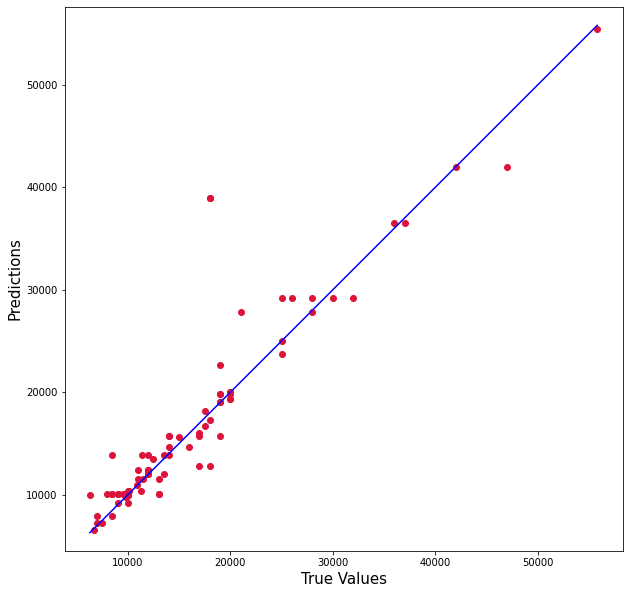

In [598]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_te_pred, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_te_pred), max(y_test))
p2 = min(min(y_te_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()